# APP1-Vents

## Resonance frequency

For a cylindrical tube with length $L$ and radius $a$, assume the input mechanical impedance at $x=0$ is $Z_{m,0}$ and output impedance at $x=L$ is $Z_{m,L}$. The relation between $Z_{m,0}$ and $Z_{m,L}$ is given by
$$
    Z_{m,0} = \frac{\rho_0 c_0}{S} \frac{Z_{m,L} + j \frac{\rho_0 c_0}{S} \tan(kL)}{\frac{\rho_0 c_0}{S} + j Z_{m,L} \tan(kL)}
$$
where $S$ is the cross-sectional area of the duct, $\rho_0$ is the air density, $c_0$ is the speed of sound, and $k$ is the wave number. From this equation, the input impedance depends on the output impedance(load impedance) as well as the length of the tube. Resonance frequency is given by
$$
    f = \text{argmax}_{f}(Z_{m,0}) 
$$

Known that usually $Z_{m,L} \neq 0$ since the tube radiates sound tinto the surrounding, assume that $Z_{m,L} = Z_r$ where $Z_r$ is the radiation impedance. In a radiation model, for a flanged tube (output is an infinite plane), $Z_r = \frac{\rho_0 c_0}{S} \frac{(ka^2)}{2} + j \frac{\rho_0 c_0}{S} \frac{8ka}{3\pi}$; for a unflanged tube, $Z_r = \frac{\rho_0 c_0}{S} \frac{(ka^2)}{4} + j \frac{\rho_0 c_0}{S} 0.6 ka$;
for a closed tube, $Z_r = \infty$.

Under a flanged tube condition, the resonance frequency could be solved by
$$
    \tan(n\pi - k_nL) = \frac{8ka}{3\pi} =  \tan(\frac{8ka}{3\pi})
$$
so that $f_n = \frac{n}{2} \frac{c_0}{L + \frac{8a}{3\pi}}$. The effective length of the tube is $L_{eff} = L + \frac{8a}{3\pi}$. Note that $L_{eff} = L + \Delta L$, $\Delta L = \frac{8a}{3\pi}$ is called end correction. This $\Delta L$ is caused by the additional mass $\mathcal{Im}(Z_r)$ at the end of the tube.

Under a unflanged tube condition, the effective length of the tube is $L_{eff} = L + 0.6a$. This result is obtained only for the tibe with constant cross-sectional area.


For a conical tube, the relation of impedance follows
\begin{align*}
    \begin{bmatrix}
        p_1\\
        u_1
    \end{bmatrix}
    =
    \begin{bmatrix}
        A & B \\ C & D
    \end{bmatrix}
    \begin{bmatrix}
        p_2\\
        u_2
    \end{bmatrix}
\end{align*}
where 
\begin{align*}
    A &= \frac{R_2}{R_1} \cos(kL) - \frac{\sin(kL)}{kx_1}\\
    B &= j\frac{\rho_0 c_0}{\pi R_1 R_2}\sin(kL)\\
    C &= \frac{\pi R_1 R_2}{\rho_0 c_0}\left( j \sin(kL) \left( 1 + \frac{1}{k^2x_1 x_2}\right) + \frac{\cos(kL)}{jk}\left(\frac{1}{x_1}-\frac{1}{x_2}\right) \right)\\
    D &= \frac{R_1}{R_2}\cos(kL) + \frac{\sin(kL)}{kx_2}
\end{align*}
and $Z_{m,i} = \frac{p_i}{u_i}$. The cylindrical tube is a special case of the conical tube with $R_1 = R_2 = a$ and $x_1 = x_2 = \infty$.

## Loss in the tube: Averaged losses

we calculate the transfer matrix of a conical tube in which losses are calculated for an “average” radius.

In a "wide" tube, Stokes number $r_v = |k_vR| > 10$, the losses are expressed by a propagation constant
\begin{equation*}
    \Gamma = j\frac{\omega}{c} \left( 1 + \frac{\alpha_1 (1-j)}{r_v} - j \frac{\alpha_2}{r_v^2} \right)
\end{equation*}
where $\alpha_1=1.044$ and $\alpha_2=1.080$ are damping coefficients, $r_v=R\sqrt{\frac{\omega}{cl_v}}$, $l_v=\frac{\mu}{\rho c}=4\times 10^{-8}$ m. This leads to the change of wave number $k$
\begin{equation*}
    k = \frac{\omega}{c} \left( 1 + \frac{\alpha_1 (1-j)}{r_v} - j \frac{\alpha_2}{r_v^2} \right)
\end{equation*}

Usually, we take the first order to calculate the losses.

## Imports

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


## Parameters

In [142]:
# load Pabsc and Prayon
Pabsc = np.loadtxt('Pabsc.csv')
Prayon = np.loadtxt('Prayon.csv')

# parameters
config = {
    'speed of sound': 343.0,    # m/s
    'density of air': 1.2,      # kg/m^3
    'damping coeff': [1.044, 1.080],
    
}

In [143]:
c0 = config['speed of sound']
rho0 = config['density of air']
alpha = config['damping coeff']

## Geometry Model of Trompette

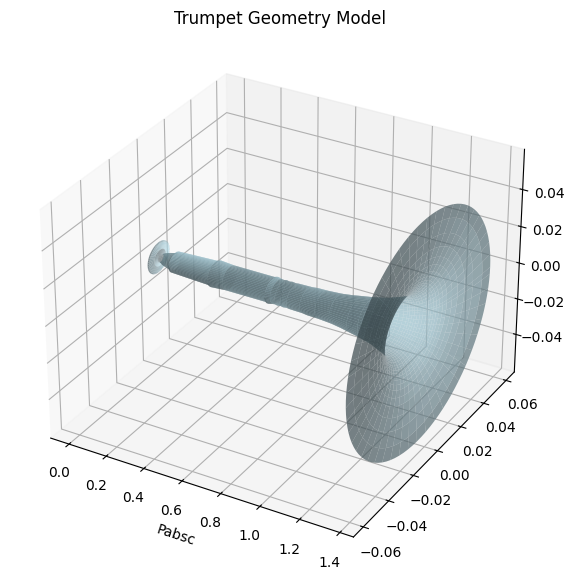

In [144]:
theta = np.linspace(0, 2 * np.pi, 100)

Pabsc_grid, theta_grid = np.meshgrid(Pabsc, theta)
Prayon_grid = np.tile(Prayon, (100, 1))

X = Pabsc_grid
Y = Prayon_grid * np.cos(theta_grid)
Z = Prayon_grid * np.sin(theta_grid)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='lightblue', alpha=0.7)

ax.set_xlabel('Pabsc')
ax.set_title('Trumpet Geometry Model')
plt.show()

## Find the resonance frequency

In [145]:
def transfer_function(Z2, x1, x2, R1, R2, freq):
# Note that x1 and x2 are the real positions, not the length of the apex to the x

    l = x2 - x1

    # case divergence
    if R1 < R2:
        x1 = R1 * l / (R2 - R1)
        x2 = x1 + l
    # case convergence
    elif R1 > R2:
        x2 = - R2 * l / (R1 - R2)
        x1 = x2 - l
    # case straight
    else:
        x1, x2 = np.inf, np.inf

    omega = 2 * np.pi * freq
    R = (R1 + R2) / 2
    lv = 4e-8
    rv = R * np.sqrt(omega / (c0 * lv))
    k = omega / c0 * (1 + alpha[0] * (1 - 1j) / rv - alpha[1] / rv**2)

    if x1 == np.inf and x2 == np.inf:
        A = np.cos(k * l)
        B = 1j * rho0 * c0 * np.sin(k * l) / (np.pi * R1 * R2)
        C = 1j * np.sin(k * l) * (np.pi * R1 * R2) / (rho0 * c0)
        D = np.cos(k * l)
    else:
        A = R2 / R1 * np.cos(k * l) - np.sin(k * l) / (k * x1)
        B = 1j * rho0 * c0 * np.sin(k * l) / (np.pi * R1 * R2)
        C = np.pi * R1 * R2 / (rho0 * c0) * (1j * np.sin(k * l) * (1 + 1 / (k**2 * x1 * x2)) + np.cos(k * l) / (1j * k) * (1 / x1 - 1 / x2))
        D = R1 / R2 * np.cos(k * l) + np.sin(k * l) / (k * x2)

    Z1 = (A * Z2 + B) / (C * Z2 + D)
    return Z1

In [146]:
def transfer_function_continues(Z2, x, R, freq):
# x: array of positions
# R: array of radius of curvature
    for idx in range(len(x) - 1, 0, -1):
        x2 = x[idx]
        R2 = R[idx]
        x1 = x[idx - 1]
        R1 = R[idx - 1]

        Z2 = transfer_function(Z2, x1, x2, R1, R2, freq)

    return Z2

For a fringed tube:

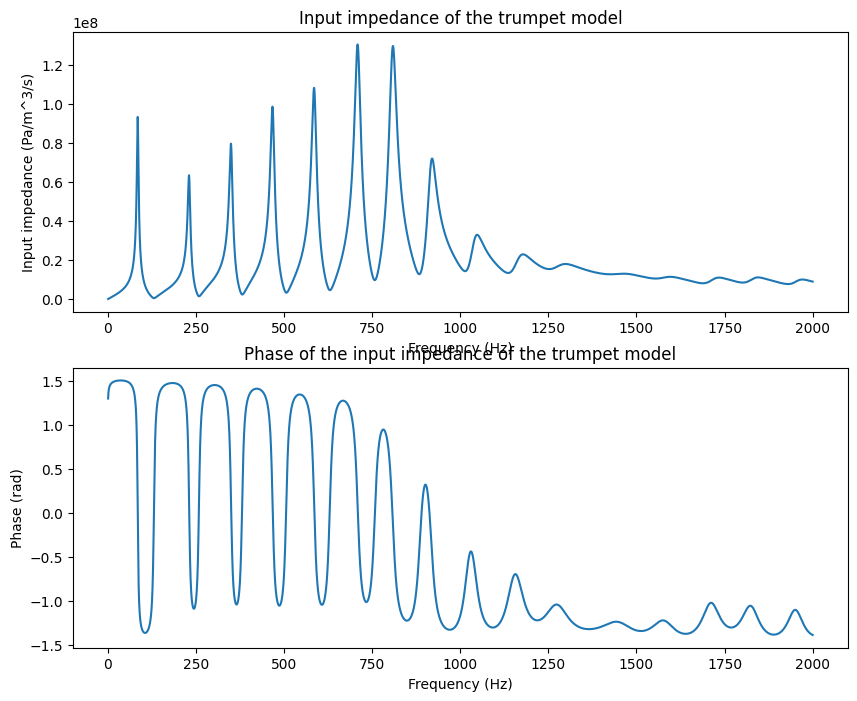

In [156]:
a = Prayon[-1]
S = np.pi * a**2
Z_input = []
freqs = np.arange(1, 2000, 0.01)
# freqs = [1000]

for freq in freqs:
    k = 2 * np.pi * freq / c0
    Zr = rho0 * c0 / S * (k * a)**2 / 2 + 1j * rho0 * c0 / S * (8 * k * a / (3 * np.pi))

    Z0 = transfer_function_continues(Zr, Pabsc, Prayon, freq)
    Z_input.append(Z0)
    # print(f"k = {k}, Z0 = {Z0}")

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(freqs, np.abs(Z_input))
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Input impedance (Pa/m^3/s)')
ax[0].set_title('Input impedance of the trumpet model')

ax[1].plot(freqs, np.angle(Z_input))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Phase (rad)')
ax[1].set_title('Phase of the input impedance of the trumpet model')
plt.show()



In [157]:
# find resonance frequencies
peaks, _ = find_peaks(np.abs(Z_input))
freq_resonances = freqs[peaks]

for idx in peaks:
    print(f"Frequency \t {freqs[idx]} \t Impedance \t {np.abs(Z_input[idx]):.4e}")

Frequency 	 84.85000000000008 	 Impedance 	 9.3356e+07
Frequency 	 230.4600000000002 	 Impedance 	 6.3499e+07
Frequency 	 349.4300000000003 	 Impedance 	 7.9680e+07
Frequency 	 467.2200000000004 	 Impedance 	 9.8642e+07
Frequency 	 585.2900000000005 	 Impedance 	 1.0828e+08
Frequency 	 708.8000000000006 	 Impedance 	 1.3049e+08
Frequency 	 809.0500000000008 	 Impedance 	 1.2972e+08
Frequency 	 920.1400000000008 	 Impedance 	 7.2067e+07
Frequency 	 1047.950000000001 	 Impedance 	 3.3000e+07
Frequency 	 1178.320000000001 	 Impedance 	 2.2985e+07
Frequency 	 1298.6900000000012 	 Impedance 	 1.8046e+07
Frequency 	 1462.9000000000012 	 Impedance 	 1.3089e+07
Frequency 	 1595.7400000000014 	 Impedance 	 1.1474e+07
Frequency 	 1734.3800000000015 	 Impedance 	 1.1080e+07
Frequency 	 1845.0900000000017 	 Impedance 	 1.1186e+07
Frequency 	 1970.8000000000018 	 Impedance 	 1.0091e+07


In [158]:
standard_freqs = np.loadtxt('resonance_freq.csv')

def calculate_cent(f1, f2):
    return 1200 * np.log2(f2 / f1)

for i in range(len(standard_freqs)):
    print(f"Cent difference between {standard_freqs[i]} and {freq_resonances[i]} is {calculate_cent(standard_freqs[i], freq_resonances[i])}")

Cent difference between 84.87 and 84.85000000000008 is -0.4080212248583625
Cent difference between 230.68 and 230.4600000000002 is -1.651869365877092
Cent difference between 349.88 and 349.4300000000003 is -2.2280688953691135
Cent difference between 467.92 and 467.2200000000004 is -2.5918345075463303
Cent difference between 586.31 and 585.2900000000005 is -3.01444038271174
Cent difference between 710.28 and 708.8000000000006 is -3.611110468186789
Cent difference between 810.69 and 809.0500000000008 is -3.50577847148369
Cent difference between 921.72 and 920.1400000000008 is -2.9702045415810403
Cent difference between 1048.3 and 1047.950000000001 is -0.5781103616479003
Cent difference between 1175.2 and 1178.320000000001 is 4.590106221560123
Cent difference between 1292.7 and 1298.6900000000012 is 8.003511955536306
Cent difference between 1424.9 and 1462.9000000000012 is 45.56457604464884
Cent difference between 1552.4 and 1595.7400000000014 is 47.67032240470291
Cent difference between 